# Cost Minimization using Gradient Descent
> In this post, it will cover cost minimization using Gradient Descent.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Tensorflow, Machine_Learning]
- image: images/grad_desc.png

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('seaborn')

## Hypothesis and cost function
From the [previous post](https://goodboychan.github.io/chans_jupyter/python/tensorflow/2020/09/05/01-Simple-Linear-Regression-with-Tensorflow.html), we covered the definition of hypothesis and cost function(also known as Loss function)

$$ \text{Hypothesis: } \quad H(x) = Wx + b \\ \text{Cost: } \quad cost(W, b) = \frac{1}{m} \sum_{i=1}^m(H(x_i) - y_i)^2 $$

Actually, when we try to explain the hypothesis, we usually embed the bias term into the weight vector. So it just simplifies the form like this,

$$ \text{Hypothesis: } \quad H(x) = Wx \\ \text{Cost:} \quad cost(W) = \frac{1}{m} \sum_{i=1}^m(W x_i - y_i)^2 $$

Through the learning process, we want to find the optimal weight vector($W$) for minimizing cost function. As I explained earlier post, the common approach to find the minimum value is to calculate the gradient of each point,then find the pattern of decreasing(descent). This kind approach is called **gradient descent**, and it is used lots of minimization problems.

## Gradient Descent Algorithm

The detailed process of gradient descent is like this:
- Start with initial guess,

    - Usually select 0,0 (but we can select other values at the beginning)
    - Keeping changing $W$ and $b$ a little bit with learning rate to try and reduce cost
    
- Each time, we can change its parameter, then we can calculate the gradient which reduces cost function the most possible
- Repeat
- Do so until it converge to a minimum

But actually, we can not sure that the minimum value that we found from Gradient Descent is global optimum. In some cases, the minimum value may be the local minimum.

![gradient_descent](image/gradient_descent.png)

In the figure, it is easy to find the global minimum through Gradient descent. When we start with initial weights, through the direction of decreasing gradient, it updates its weights to find the point of minimum cost. Wherever we change the inital points, it may be found the global minimum point.

So, how can we update the weight while finding the minimum point? We use "gradient" for each data point, it requires derivates of cost function. The formal definition of weight update is mentioned below.

$$ \begin{aligned} W &:= W - \alpha * \frac{\partial}{\partial W} \frac{1}{2m} \sum_{i=1}^m (W(x_i) - y_i)^2 \\ &:= W - \alpha * \frac{1}{2m} \sum_{i=1}^{m} 2 (W (x_i) - y_i) x_i \\ & := W - \alpha \frac{1}{m} \sum_{i=1}^m (W(x_i) - y_i) x_i \end{aligned} $$

Here, $\alpha$ is learning rate. And there is a assumption in formal definition that coefficient of cost function is changed from $\frac{1}{m}$ to $\frac{1}{2m}$. That's because, when the derivate of 2nd order term generates 2, so it is easy to simplify the constant term when we have $2m$, and it is not affect too much in whole calculation.

As a result, weight vector is changed with respect to $\alpha$ while updating.

## Cost function in pure Python
Let's build the model with python. This may be the duplicate of previous post content.

In [4]:
# Sample data
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

# Cost function
def cost_func(W, X, Y):
    c = 0
    for x, y in zip(X, Y):
        c += (W*x - y) ** 2
    return c / len(X)

cost_hist = []

for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    cost_hist.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


Through cost function, we calculated the MSE, and measured cost for each weight values. As you can see, cost is minimized when $W=1$. We can also confirm from the visualization of the cost value.

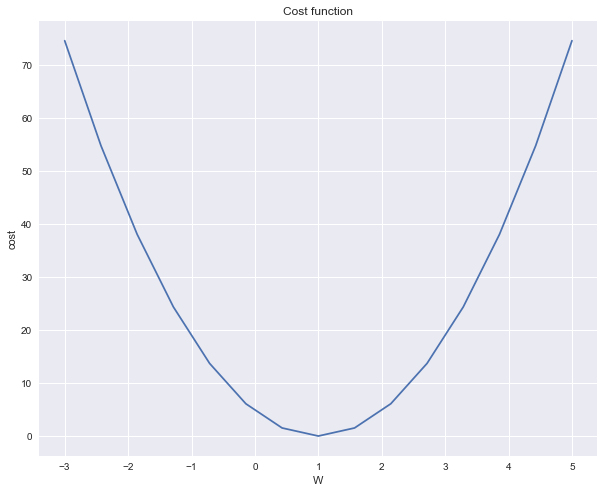

In [8]:
plt.figure(figsize=(10, 8));
plt.plot(np.linspace(-3, 5, num=15), cost_hist);
plt.title('Cost function');
plt.xlabel('W');
plt.ylabel('cost');

## Cost function in Tensorflow
We can derive the result using Tensorflow. In this time, we can calculate the MSE with `tf.reduce_mean`

In [9]:
def cost_func_tf(W, X, Y):
    h = X * W
    return tf.reduce_mean(tf.square(h - Y))

W_values = np.linspace(-3, 5, num=15)
cost_hist = []

for feed_W in W_values:
    curr_cost = cost_func_tf(feed_W, X, Y)
    cost_hist.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


We can get same result here as described before.

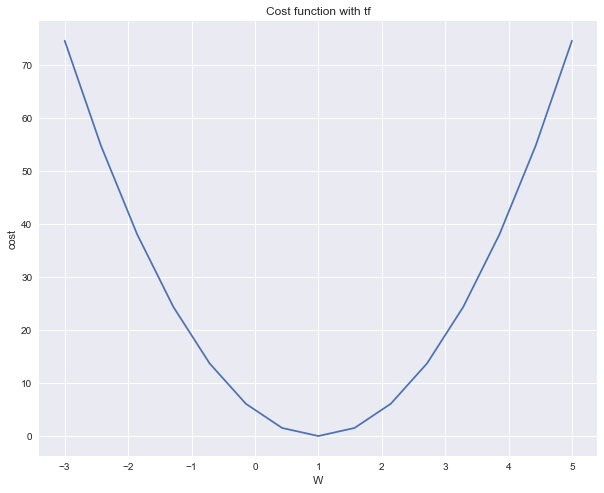

In [10]:
plt.figure(figsize=(10, 8));
plt.plot(np.linspace(-3, 5, num=15), cost_hist);
plt.title('Cost function with tf');
plt.xlabel('W');
plt.ylabel('cost');

## Gradient Descent in Tensorflow
As we explained it earlier, we can express the gradient descent algorithm in Tensorflow. Remember that the definition of gradient descent is that,

$$ W := W - \alpha \frac{1}{m} \sum_{i=1}^m (W(x_i) -y_i) x_i $$

> Note: For the test, we set the learning rate($\alpha$) to 0.01, and epochs to 300

In [17]:
X = [1., 2., 3., 4.]
Y = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal([1], -100., 100.))
alpha = 0.01
cost_hist = []
W_hist = []

for e in range(300):
    h = W * X
    cost = tf.reduce_mean(tf.square(h - Y))
    
    # Gradient Descent
    gradient = tf.reduce_mean((W * X - Y) * X)
    descent = W - alpha * gradient
    # update weight
    W.assign(descent)
    
    if e % 10 == 0:
        cost_hist.append(cost.numpy())
        W_hist.append(W.numpy()[0])
        print('{:5} | {:10.4f} | {:10.6f}'.format(e, cost.numpy(), W.numpy()[0]))

    0 |  3147.8733 |  20.616623
   10 |   662.1220 |  10.356780
   20 |   139.3744 |   5.651799
   30 |    29.4417 |   3.494178
   40 |     6.3231 |   2.504731
   50 |     1.4614 |   2.050988
   60 |     0.4389 |   1.842910
   70 |     0.2239 |   1.747489
   80 |     0.1787 |   1.703730
   90 |     0.1692 |   1.683663
  100 |     0.1672 |   1.674461
  110 |     0.1668 |   1.670241
  120 |     0.1667 |   1.668306
  130 |     0.1667 |   1.667418
  140 |     0.1667 |   1.667011
  150 |     0.1667 |   1.666825
  160 |     0.1667 |   1.666739
  170 |     0.1667 |   1.666700
  180 |     0.1667 |   1.666682
  190 |     0.1667 |   1.666674
  200 |     0.1667 |   1.666670
  210 |     0.1667 |   1.666668
  220 |     0.1667 |   1.666667
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667


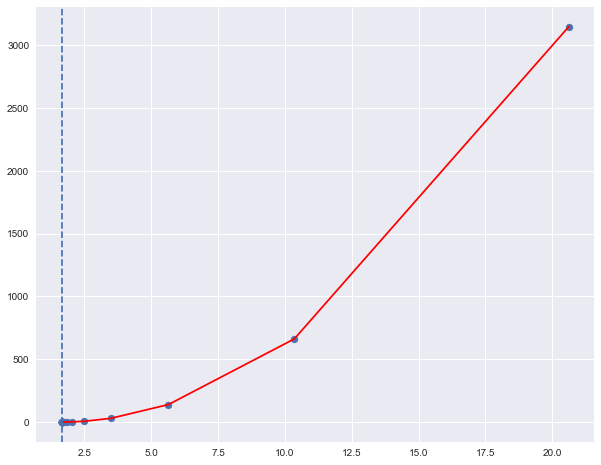

In [22]:
plt.figure(figsize=(10, 8));
plt.scatter(W_hist, cost_hist);
plt.plot(W_hist, cost_hist, color='red');
plt.axvline(x=min(W_hist), linestyle='--');

As you can see from the figure, Gradient Descent tends to find the $W$ for minimizing cost.

## Summary
In this post, we tried to explain what the hypothesis and cost function (again!!), and we want to find the best Weight vector (and also bias)  for minimizing error between hypothesis and actual data. To do this, Gradient Descent Algorithm is introduced, and test it with real code (both python and tensorflow)